<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/UN_decade_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Vinca Rosmorduc (CLS), Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FUNOD%2FCh07%2FSLR_S6%2FSLR_with_S6.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/UNOD/Ch07/SLR_S6/SLR_with_S6.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** if you are using or plan to use the EUMETSAT Data Store

There are no prerequisite notebooks for this module.
</div>
<hr>

# Calculating sea level rise from Sentinel-6

<font color="#138D75">**UN Ocean Decade Challenge 7: Expand the Global Ocean Observing System**</font>

### Data used

| Product Description  | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-6 Poseidon-4 Altimetry Level 2 Low Resolution (baseline version F08) Reprocessed | EO:EUM:DAT:0842 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0842" target="_blank">Description</a> | - | - | - | - |
| Global ocean MSL time series and trend from observations (reprocessing) | - | - | - | - | OMI_CLIMATE_SL_GLOBAL_area_averaged_anomalies | <a href="https://data.marine.copernicus.eu/product/OMI_CLIMATE_SL_GLOBAL_area_averaged_anomalies/description" target="_blank">Description</a>|
| Global ocean MSL trend map from observations (reprocessing) | - | - | - | - | OMI_CLIMATE_SL_GLOBAL_regional_trends | <a href="https://data.marine.copernicus.eu/product/OMI_CLIMATE_SL_GLOBAL_regional_trends/description" target="_blank">Description</a>|


### Learning outcomes

At the end of this notebook you will know how to ;

* access a single cycle of Sentinel-6 level 2 low resolution reprocessed data through the EUMETSAT Data Store
* process the data for a single estimate of mean sea level across this cycle
* plot a full 30-year mean sea level time series using data from the Copernicus Marine Service and AVISO/CNES
* plot the regional sea level trend and acceleration using data from the Copernicus Marine Service

### Outline

<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/MSL_regional_trends.png' align='right' width='100%'/>

Mean sea level is a key indicator of climate change. Its evolution is the most visible, short-term consequence of climate change for coastal communities, especially when they are in low-lying areas. In this notebook, which aligns with UN Ocean Decade challenge 7, we will show how radar altimetry is used to measure mean sea level, focussing on data from the latest satellite in the altimetry reference mission; Sentinel-6 Michael Freilich. The reference mission, which has run since 1992 provides a consistent, inter-calibrated record of mean sea level across the Topex/Poseidon, Jason-1, Jason-2, Jason-3, and Sentinel-6 missions, allowing for the construction of a high-quality 30+ year time series of mean sea level. We will not show how to derive this whole time series, which is the result of a substantial amount of effort over the past three decades! Rather, we will show the basis of computing one point in this along-time data series using a single cycle from Sentinel-6 Michael Freilich. Following this, we we will plot and consider this time series, taking data from two external sources, the Copernicus Marine Service and AVISO/CNES. We will discuss the differences between these time series, the subtle complexity in calculating mean sea level and finish by showing the spatial variation in the trend and its acceleration on a global map.

As part of the United Nations Ocean Decade, ten specific challenges are being addressed. This work, and the data underlying it, support Challenge 7 - Sustainably expand the Global Ocean Observing System (GOOS). Satellite altimetry is a key contributor to the GOOS, and Sentinel-6 Michael Freilich provides the operational basis by which the altimetry reference mission will be carried into the future, allowing for continued monitoring of mean sea level.

#### References

* Meyssignac, B., Chenal, J., Loeb, N., Guillaume-Castel, R., & Ribes, A. (2023). Time-variations of the climate feedback parameter λ are associated with the Pacific Decadal Oscillation. Communications Earth & Environment, 4(1), 241.
* von Schuckmann, K., Le Traon, P. Y., Smith, N., Pascual, A., Djavidnia, S., Gattuso, J. P., … Zupa, W. (2021). Copernicus Marine Service Ocean State Report, Issue 5. Journal of Operational Oceanography, 14(sup1), 1–185.
* Guérou, A., Meyssignac, B., Prandi, P., Ablain, M., Ribes, A., and Bignalet-Cazalet, F.: Current observed global mean sea level rise and acceleration estimated from satellite altimetry and the associated measurement uncertainty, Ocean Sci., 19, 431–451, 2023.
* Prandi P, Meyssignac B, Ablain M, Spada G, Ribes A, Benveniste J (2021). Local sea level trends, accelerations and uncertainties over 1993-2019. Scientific Data, 8(1). DOI: 10.1038/s41597-020-00786-7.
* Nerem, R. S., Beckley, B. D., Fasullo, J. T., Hamlington, B. D., Masters, D., & Mitchum, G. T. (2018). Climate-change-driven accelerated sea-level rise detected in the altimeter era. Proceedings of the National Academy of Sciences, 201717312. DOI: 10.1073/pnas.1717312115.
* <a href="https://www.aviso.altimetry.fr/en/data/products/ocean-indicators-products/mean-sea-level.html" target="_blank">AVISO web MSL page</a>
* <a href="https://oceandecade.org/challenges/" target="_blank">UN Ocean Decade challenges</a>

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>
    
 1. [Setting up our analysis](#section1)
 1. [Downloading from the EUMETSAT Data Store via API](#section2)
 1. [Aggregating and processing our Sentinel-6 products](#section3)
 1. [Spatially binning the along-track data](#section4)
 1. [Calculating the global mean for this cycle](#section5)
 1. [Plotting individual altimetry mission time series](#section6)
 1. [Comparing MSL time series from the Copernicus Marine Service and CNES/AVISO](#section7)
 1. [Fetching a global sea-level trend maps from the Copernicus Marine Service](#section8)
 1. [Conclusions](#section9)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

In this section we will set up all the parameters we need to run our notebook.

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../../README.md" target="_blank">README</a>**.

In [1]:
import glob                     # a package that helps with file searching
import os                       # a library that allows us access to basic operating system commands
import eumdac                   # a tool that helps us download via the eumetsat/data-store
from pathlib import Path        # a library that helps construct system path objects
import datetime                 # a library that allows us to work with dates and times
import shutil                   # a library that allows us access to basic operating system commands like copy
import cartopy                  # a library that supports mapping and projection
import matplotlib.pyplot as plt # a library the provides plotting capability
import xarray as xr             # a library that helps us work efficiently with multi-dimensional arrays
import numpy as np              # a library that lets us work with arrays; we import this with a new name "np"
from scipy import stats         # a statistical library
import copernicusmarine         # a library that enables accessing CMEMS data
import pandas as pd             # a library for time series analysis
import cmocean as cm            # a library that contains oceanographic colour maps
import warnings                  # a library that supports managing warning messages

# turn off warnings
warnings.filterwarnings("ignore")

Lets now specify the data that we wan't to retrieve from the EUMETSAT Data Store. We do this by choosing the right "collectionID", which determines the correct collection that we want, and the cycle number of interest. Lastly, we will specify a directory to download these products into (there will be a lot of them, 254 in total!).

In [2]:
download_data = True
collectionID = 'EO:EUM:DAT:0842'
cycle = 53

# Create a download directory for our products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

In the next step we will connect to the Data Store to download our products.

<div class="alert alert-info" role="alert">

## 2. <a id='section2'></a>Downloading from the EUMETSAT Data Store via API
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [3]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token 'cc52cc6d-5488-3c7e-9f86-578c171b4be8' expires 2025-06-11 15:18:46.963816


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [4]:
datastore = eumdac.DataStore(token)

Now we have connected to the Data Store, lets check all the available collection for the Sentinel-6 Poseidon-4 altimeter, and check that our specified collection (from the cell above) matches with the high resolution level 2 reprocessed data that we need.

In [5]:
if download_data:
    for collection_id in datastore.collections:
        if ("Poseidon-4" in collection_id.title):
            if "non-public" in collection_id.abstract: continue
            print(f"Collection ID({collection_id}): {collection_id.title}")

Collection ID(EO:EUM:DAT:0142): Poseidon-4 Level 2P Wind/Wave Products Low Resolution in NRT - Sentinel-6
Collection ID(EO:EUM:DAT:0143): Poseidon-4 Level 3 Wind/Wave Products Low Resolution in NRT - Sentinel-6
Collection ID(EO:EUM:DAT:0601): Poseidon-4 Level 3 Altimetry Low Resolution in NTC - Sentinel-6
Collection ID(EO:EUM:DAT:0850): Poseidon-4 Altimetry Level 1A High Resolution - Sentinel-6
Collection ID(EO:EUM:DAT:0851): Poseidon-4 Altimetry Level 1B High Resolution - Sentinel-6
Collection ID(EO:EUM:DAT:0852): Poseidon-4 Altimetry Level 1B Low Resolution - Sentinel-6
Collection ID(EO:EUM:DAT:0854): Poseidon-4 Altimetry Level 2 Low Resolution - Sentinel-6
Collection ID(EO:EUM:DAT:0855): Poseidon-4 Altimetry Level 2 High Resolution - Sentinel-6
Collection ID(EO:EUM:DAT:0857): Poseidon-4 Altimetry Level 2P Low Resolution - Sentinel-6
Collection ID(EO:EUM:DAT:0858): Poseidon-4 Altimetry Level 2P High Resolution - Sentinel-6
Collection ID(EO:EUM:DAT:0859): Poseidon-4 Level 3 Altimetry 

From the lists above, we have picked the "Poseidon-4 Altimetry Level 2 Low Resolution (baseline version F08) - Sentinel-6 - Reprocessed" collection ID. (the baseline number is evolving with new reprocessing; if you have older files from another baseline (see at the end of the folder/file name, just before the .SEN6 or .nc), replace them with the newest, *_do not use inhomogeneous baselines_* especially not in computations such as mean sea level).

* we choose LR data as they are more homogeneous with previous missions, and you don't need high resolution data to compute a global mean sea level. 
* we choose NTC data as they are more accurate (in particular relative to the orbit), and more homogeneous along the mission. When a reprocessing is done, it is done on the whole mission from its beginning, while NRT or STC processing or corrections can be changed without this applied to the oldest data. 
* we choose reduced because we don't need the extra information you have in the standard version.

Lets now apply our cycle number and "NT" timeliness to the collection and see how many products we can identify that match our search

In [6]:
if download_data:
    selected_collection = datastore.get_collection(collectionID)
    # space/time filter the collection for products
    products = selected_collection.search(cycle=cycle, timeliness="NT")
    print(f"Found {len(products)} products")

Found 254 products


Now we will download them. We will download only the files we'll be using, and so select only the "reduced" (RED) files only from the NTC delay ('NT') products. (NB using the reprocessed product, they will always be "NTC", so there is no necessity for this condition in fact - just to show how it is done)

In [7]:
if download_data:
    count = 0
    for product in products:
        count = count + 1
        for entry in product.entries:
            if 'S6A_P4_2__LR_RED_' in entry:
                with product.open(entry=entry) as fsrc, open(os.path.join(os.getcwd(), 'products',fsrc.name), mode='wb') as fdst:
                    shutil.copyfileobj(fsrc, fdst)
                    print(f'Downloaded ({str(count).zfill(3)}:{len(products)}): {fsrc.name}')

Downloaded (001:254): S6A_P4_2__LR_RED__NT_053_254_20220427T035656_20220427T045309_F08.nc
Downloaded (002:254): S6A_P4_2__LR_RED__NT_053_253_20220427T030043_20220427T035656_F08.nc
Downloaded (003:254): S6A_P4_2__LR_RED__NT_053_252_20220427T020430_20220427T030043_F08.nc
Downloaded (004:254): S6A_P4_2__LR_RED__NT_053_251_20220427T010817_20220427T020430_F08.nc
Downloaded (005:254): S6A_P4_2__LR_RED__NT_053_250_20220427T001204_20220427T010817_F08.nc
Downloaded (006:254): S6A_P4_2__LR_RED__NT_053_249_20220426T231552_20220427T001204_F08.nc
Downloaded (007:254): S6A_P4_2__LR_RED__NT_053_248_20220426T221939_20220426T231552_F08.nc
Downloaded (008:254): S6A_P4_2__LR_RED__NT_053_247_20220426T212326_20220426T221939_F08.nc
Downloaded (009:254): S6A_P4_2__LR_RED__NT_053_246_20220426T202713_20220426T212326_F08.nc
Downloaded (010:254): S6A_P4_2__LR_RED__NT_053_245_20220426T193100_20220426T202713_F08.nc
Downloaded (011:254): S6A_P4_2__LR_RED__NT_053_244_20220426T183447_20220426T193100_F08.nc
Downloaded

<div class="alert alert-info" role="alert">

## 3. <a id='section3'></a>Aggregating and processing our Sentinel-6 products
[Back to top](#TOC_TOP)

</div>

Now it is time to start working with our data. We are going to read the data for a full cycle (tracks 1 to 254) so that we can work on it all in one go. Lets start by finding all the files and sorting the files into into a sensible order.

In [8]:
s6_files = glob.glob(os.path.join(download_dir,'S6A_P4_2__LR_RED_*.nc'))
# we sort the files - by default it is "alphabetical" order, but pass numbers are also correctly ordered, which is our goal
# this sorting will provide with a well-orderer dataset/nc file (see next cell). 
# It is not absolutely vital to the present computation, but could be necessary in other cases
s6_files.sort()

Sentinel-6 products are stored in "grouped" netCDF files, so we need to open two xarray objects to work with the data from each group. The "data_01" group contains the fundamental coordinates we need; latitude, longitude and time. The "data_01/ku" group contains the geophysical variables, such as sea surface heigh anomaly "ssha". This cell will take a bit of time to run....

In [9]:
if s6_files != []:
    s6cycle01 = xr.open_mfdataset(s6_files, group='data_01', combine='nested', concat_dim='time', compat='no_conflicts')
    s6cycle01ku = xr.open_mfdataset(s6_files, group='data_01/ku', combine='nested', concat_dim='time', compat='no_conflicts')
else:
    print('no files found')

Lets take a quick look in the "data_01/ku" group to see what variables are present, and how many measurements we have.

In [10]:
s6cycle01

<xarray.Dataset> Size: 527MB
Dimensions:                                   (time: 849249)
Coordinates:
    latitude                                  (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    longitude                                 (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
  * time                                      (time) datetime64[ns] 7MB 2022-...
Data variables: (12/88)
    altitude                                  (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    altitude_rate                             (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    altitude_rate_mean_sea_surface            (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    angle_of_approach_to_coast                (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    climato_use_flag                          (time) float32 3MB dask.array<chunksize=(3373,), meta=np.ndarray>
    dac                                       (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    ...                                        ...
    total_electron_content                    (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_alt                            (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_alt_mle3                       (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_alt_nr                         (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_mod_u                          (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_mod_v                          (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>

We can see that "ssha" is present, we will read the data from all tracks into single variables.

In [11]:
#definition of the variables we will need
lat = s6cycle01['latitude']
lon = s6cycle01['longitude']
time = s6cycle01['time']
ssha = s6cycle01ku['ssha']

Next, we need to remove any low quality data. To do this, we will read in a series of quality flags from the "data_01" and "data_01/ku" groups. We will sum the flga values together as we wish to retain the "0 value" in all cases. Where the total summed flag is not zero, we discard the data. We also remove a few remaining outliers.

In [12]:
# use of the different flags ; 0 is for ocean (surface flag), no rain nor sea ice or for "good" (quality flags)
# alternate values are > 0, so if all the conditions are met, the sum will be zero.
flags_ssha = np.array(s6cycle01.surface_classification_flag) \
           + np.array(s6cycle01ku.range_ocean_qual) \
           + np.array(s6cycle01ku.off_nadir_angle_wf_ocean_qual) \
           + np.array(s6cycle01ku.sig0_ocean_qual) \
           + np.array(s6cycle01ku.swh_ocean_qual) \
           + np.array(s6cycle01.rain_flag) \
           + np.array(s6cycle01.meteo_map_availability_flag) \
           + np.array(s6cycle01.mean_sea_surface_sol1_qual) \
           + np.array(s6cycle01.rad_sea_ice_flag) \
           + np.array(s6cycle01.rad_wet_tropo_cor_qual)

ssha[flags_ssha != 0.0] = np.nan

# remove a few extreme outliers left
ssha = ssha.where((ssha > -2) & (ssha < 2))

At this stage, we have along-track data with time as dimension. Lets plot our sea surface height anomaly! Note that this scatter plot is taking time with 254 times about 3350 points to plot (this cell can be skipped with no impact on the following computations).

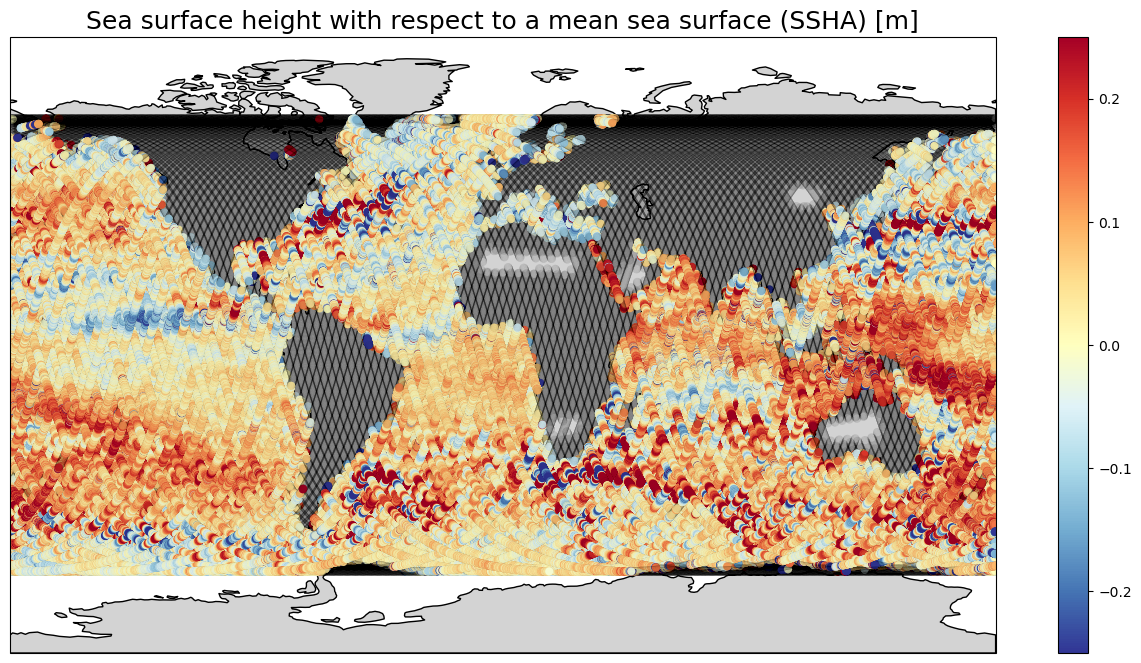

In [13]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree(), aspect=1.25)
ax.set_extent([-180, 180, -90, 90], crs=cartopy.crs.PlateCarree())
#zoom on the Mediterranean Western basin
#ax.set_extent([0, 25, 30, 50], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=0)
# actually plot the data
tracks = ax.scatter(lon, lat, c=ssha, cmap='RdYlBu_r', marker='o',  vmin=-0.25, vmax=0.25, edgecolors='black', linewidth=0.01)
cbar = plt.colorbar(tracks)
plt.title('Sea surface height with respect to a mean sea surface (SSHA) [m]', size=18)
plt.show()

Here we can see the raw, along track data, and we can pick up some clear patterns. However, some of these measurements "overlay" each other in the plot and they are not on a consistent spatial grid, so we can't easily quantitatively analyse them in this state. In the next step, we will address these issues using spatial binning. 

<div class="alert alert-info" role="alert">

## 4. <a id='section4'></a>Spatially binning the along-track data
[Back to top](#TOC_TOP)

</div>

We being by combining the datasets from the two groups into one single `xarray` object, extracting only ssha (which is in the data_01/ku group above), and the coordinates/dimension (which are in the data_01 group above). We are going to write these to a netCDF file, so as to be able to use our data again afterwards without processing it again, and so define the attributes which are needed for an the output file. Note: this is not strictly necessary if you only want to compute the mean of the cycle, but is a useful process to be aware of.

In [14]:
#creating a proper dataset with useful attributes for a nc files 
ds = xr.Dataset(
    {'ssha01': (['time'],  \
                ssha.data, \
                {'standard_name' : 'sea_surface_height_above_sea_level', \
                 'units' : "m", \
                 'coordinates' : "longitude latitude"})}, 
    coords={
        'time': (['time'], \
                 time.data, \
                 {'standard_name' : 'time', \
                  #'units' : "seconds since 2000-01-01 00:00:00.0", \ # a unit is kept in the concatenation by this dimension
                  'coordinates' : "longitude latitude"}),
        'lon01': (['time'], lon.data, \
                {'standard_name' : 'longitude', \
                 'units' : "degrees_east", \
                 'coordinates' : "longitude latitude"}), 
        'lat01': (['time'], lat.data, \
                  {'standard_name' : 'latitude', \
                   'units' : "degrees_north", \
                   'coordinates' : "longitude latitude"})})

# a few time steps are duplicated at the end of some passes and at the begining of the following one. We are removing them.
ds = ds.sel(time=~ds.indexes['time'].duplicated())

ds.to_netcdf('ssha_full_cycle_'+str(cycle)+'.nc')
s6cycle01.close()
s6cycle01ku.close()
ds

<xarray.Dataset> Size: 27MB
Dimensions:  (time: 849234)
Coordinates:
  * time     (time) datetime64[ns] 7MB 2022-04-17T06:54:38 ... 2022-04-27T04:...
    lon01    (time) float64 7MB dask.array<chunksize=(3343,), meta=np.ndarray>
    lat01    (time) float64 7MB dask.array<chunksize=(3343,), meta=np.ndarray>
Data variables:
    ssha01   (time) float64 7MB dask.array<chunksize=(3343,), meta=np.ndarray>

Now we will start our "binning" of the data in two spatial dimensions, i.e. averaging them over boxes in longitude/latitude. We need to properly take account of NaN values, ensuring that we ignore them when only **part** of a pixel is NaN, but discarding any pixels that are always NaN (e.g. those over land, of which there will be quite a few given the size of our lat/lon boxes). The "nanmean" operator will take care of this for us.

In [15]:
# steps in degrees for the pixels we will create. 
# do not go much under those values, due to the gap between tracks in longitude (315 km at the Equator)
steplon = 3
steplat = 1
lat_min = -90.0 
lon_min = 0.0
lat_max = 90.0
lon_max = 360.0

#creating the arrays of longitudes and latitudes
# NB. last point is not within the array in Python.
binnedlon = np.arange(lon_min,lon_max+steplon,steplon)
binnedlat = np.arange(lat_min,lat_max+steplat,steplat)
test = stats.binned_statistic_2d(ds.lon01, ds.lat01, ds.ssha01, statistic=np.nanmean,  bins=[binnedlon,binnedlat])

The binned_statistic-2d is outputing a (x,y) ndarray. However, in particular to plot the data on a map, you'll need a (lat,lon) matrix, so you have to "transpose" your ndarray (i.e. to switch dimensions). Moreover, so that we don't miss the 0 - 360 transition, we added one point to the statistics. We are choosing to reference the pixels ("registration") at their center ("pixel registration"), so we shift by half a pixel the lon/lat defining each pixel. The other usual solution is top left ("gridline registration").

In [16]:
#defining an output xarray dataset using pixel regisistration
binnedgrid = xr.Dataset({
    'binnedssha': xr.DataArray(
        data = test.statistic.T,
        dims = ['latitude','longitude'],
        coords =  {'latitude': test.y_edge[:-1]+ steplat/2, 'longitude': test.x_edge[:-1] + steplon/2},
        attrs = {'long_name': 'sea surface heights anomalies by lat/lon bins',
                 'units': 'm',
                 'standard_name':
                 'sea_surface_height_above_sea_level'}
        )
    },
    #global attributes can be added
    attrs = { }
    )
binnedgrid

<xarray.Dataset> Size: 175kB
Dimensions:     (latitude: 180, longitude: 120)
Coordinates:
  * latitude    (latitude) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * longitude   (longitude) float64 960B 1.5 4.5 7.5 10.5 ... 352.5 355.5 358.5
Data variables:
    binnedssha  (latitude, longitude) float64 173kB nan nan nan ... nan nan nan

Lets save the output to a netCDF file.

In [17]:
# saving the output binned grid in a netCDF file
binnedgrid.to_netcdf('binned_grid.nc')

...and plot our binned data so that we can compare it with the along-track L2 data above.

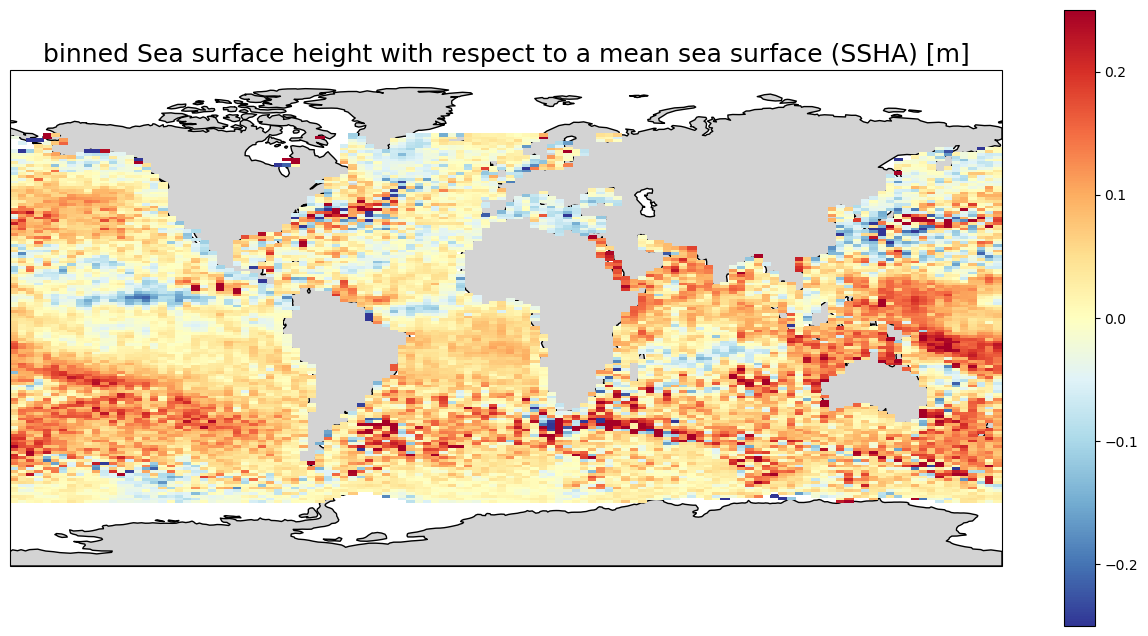

In [18]:
# plotting the resulting grid. It is a very pixellized map - which was the objective.

plt.figure(figsize=(16,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=0.))
# overlaying the continents on top makes a nicer plot (zorder continent > zorder SSHA).
# ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k')
ax.set_extent([-180, 180, lat_min, lat_max])
mymap = ax.pcolor(binnedgrid.longitude, binnedgrid.latitude, binnedgrid.binnedssha, cmap='RdYlBu_r', vmin=-0.25, vmax=0.25, shading=None, zorder=0)
# Add a colorbar to the map object to give scale
plt.colorbar(mymap, ax=ax)
# Add a title to the map object
plt.title('binned Sea surface height with respect to a mean sea surface (SSHA) [m]', size=18)
plt.show()                  

We can see that there are some spatial similarities in the patterns shown in the binned data, and in the previous figure. However, the binned data shows all of the data, without overlaying tracks, on a consistent grid and so is now suitable for quantitative analysis of the global mean sea level. We'll perform these calculations next...

<div class="alert alert-info" role="alert">

## 5. <a id='section5'></a>Calculating the global mean for this cycle
[Back to top](#TOC_TOP)

</div>

The area of each pixel is different depending on the latitude, so we weight our pixels with the cosine of the latitude so as not to overestimate the high latitude contributions. One more refinement that is often made is to weight each binned pixel with the amount of ocean within it (i.e. not count land in the whole pixel "weight"). This is done in at least some of the available MSL time series disseminated by official Data Sensors, but not here (where we overweight coastal areas in the computation). Once we have done this, we can take the weighted average, which will give us our **global mean sea level**.

In [19]:
weights = np.cos(np.deg2rad(binnedgrid['latitude']))
weights.name = "weights"
ssha_weighted = binnedgrid['binnedssha'].weighted(weights)
weighted_mean = ssha_weighted.mean(("longitude", "latitude"))
print("the Global mean sea level value (with respect to a 20-year mean) for this cycle is: ", np.around(weighted_mean.values,4), " meters")

the Global mean sea level value (with respect to a 20-year mean) for this cycle is:  0.0412  meters


We have now compressed all 250+ passes across a single cycle from a single instrument into a single number!

However, this was an exercice to show how it can be done! <b>It is not, the whole processing to do to output a complete 30-year long time series showing sea level long-term changes and trend: once done on every single cycle (since Jan. 1993! - use harmonized data with homogeneous corrections and references)</b>. To have an interannual trend you need to remove seasonal cycles, filter for 60-day and six-month periodic variations. You also have intermission biases to apply when switching from one satellite to its follow-on. You can also (or not) remove a bias to take the Glacial Isostatic Adjustement into account (-0.3 mm/yr). You can check the <a href="https://www.aviso.altimetry.fr/en/data/products/ocean-indicators-products/mean-sea-level/processing-and-corrections.html" target="_blank">AVISO processing and corrections page</a> for the details of the complete computation of a mean sea level time series from the reference mission.

Beware that the zero level of this computation is **NOT** the one you can usually see on altimetry-derived mean sea level curves. Here, zero is set by construction at the 20-year mean, while most usually the zero of the MSL time series is set at the level of the beginning of the series (in 1993). This discrepancy becomes more obvious when you compare the curves in sections 6 and 7.

<div class="alert alert-info" role="alert">

## 6. <a id='section6'></a>Plotting individual altimetry mission time series
[Back to top](#TOC_TOP)

</div>

Several altimetry missions have followed each other since 1991. Of these the Topex/Poseidon,  Jason-1, Jason-2, Jason-3 and Sentinel-6 Michael Freilich missions constitute the reference mission, as all of them were altimetry-dedicated missions, had the highest accuracy at their time, occupy a non-sunsynchronous orbit to avoid tidal aliasing and, as the series is uninterrupted since October 1992, allow for systematic calibration phases where each "follow-on" was put on the same track a few seconds after of before its predecessor to enable intercalibration. However, other altimetry missions, once readjusted (they show biases and some other differences at Level 2, including a difference of coverage in latitude), show the same global trend.

Below we will plot the global mean sea level time series from every altimetry mission, including the reference sensors. The plot also shows the "lifetime" of each mission, noted in consistently coloured bars along the bottom, as well as a dashed line that whows how our calculation above "fits" against the full time series. 

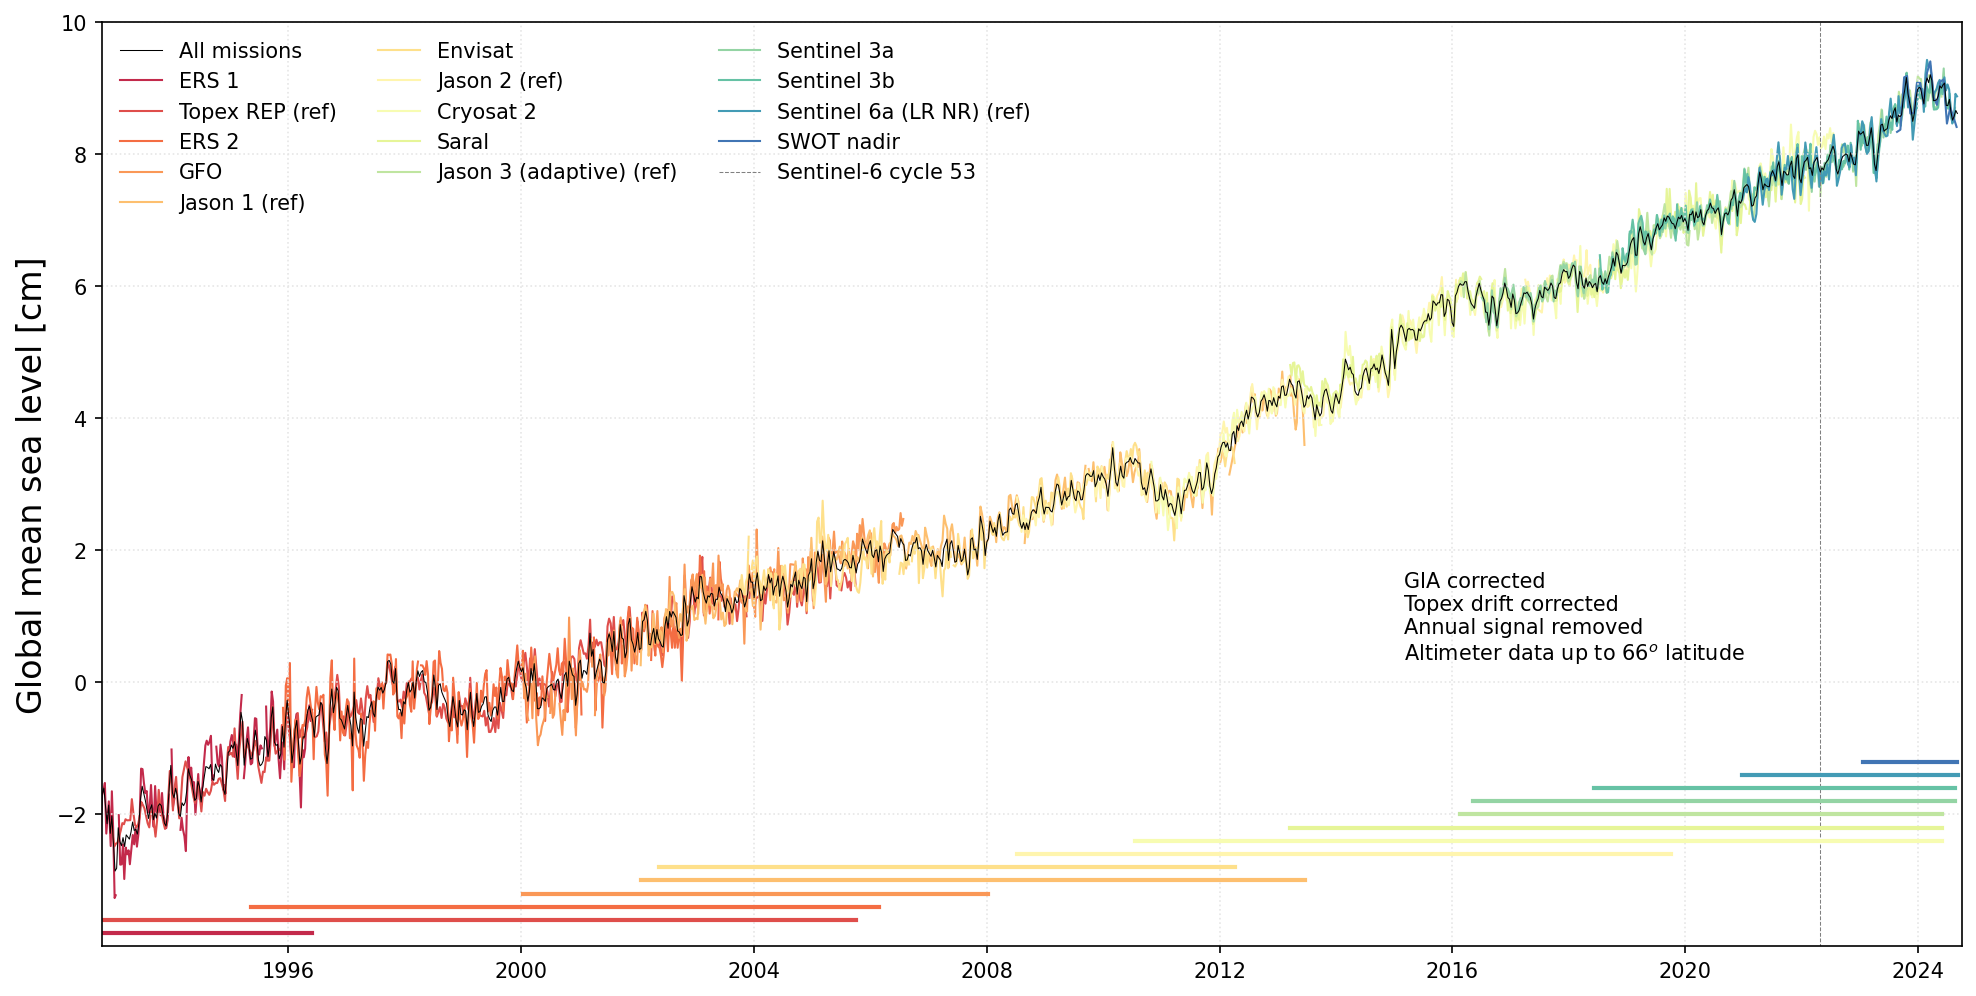

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
input_files = glob.glob(os.path.join("precomputed", "*.txt"))
labels = []
traces = []
count = 0

for input_file in sorted(input_files):
    vals = np.genfromtxt(input_file, comments="#", dtype="str")
    MSL = vals[:, 1].astype(float)*100
    dates = np.array([datetime.datetime.strptime(i[:19], "%Y-%m-%dT%H:%M:%S") for i in vals[:, 0]])
    if "All" in input_file:
        p1, = plt.plot(dates, MSL, linewidth=0.5, c="k", zorder=10)
        MSL_all = MSL.copy()
        dates_all = np.array([i.toordinal() for i in dates])
    else:
        p1, = plt.plot(dates, MSL, linewidth=1, c=plt.cm.Spectral(count/len(input_files)), zorder=1)
        p2, = plt.plot(dates, np.ones(len(MSL))*(-4 + count*2/10), linewidth=2, c=plt.cm.Spectral(count/len(input_files)), zorder=2)
    traces.append(p1)
    labels.append(os.path.basename(input_file).split('-')[-1].replace('.txt','').replace("_", " "))
    count = count + 1

p1, = plt.plot([time.mean().values, time.mean().values], [-10, 10], c="0.5", linestyle="--", linewidth=0.5, zorder=1)
traces.append(p1)
labels.append(f"Sentinel-6 cycle {cycle}")
plt.xlim([datetime.datetime(1992, 10, 17), datetime.datetime(2024, 9, 30)])
plt.ylabel('Global mean sea level [cm]', fontsize=16)
plt.ylim([-4,10])
ax.set_yticks(range(-2,12,2))
plt.grid(linestyle=":", color="0.9")
plt.legend(traces, labels, frameon=False, ncol=3)

ax.annotate("GIA corrected\nTopex drift corrected\nAnnual signal removed\nAltimeter data up to 66$^{o}$ latitude", (0.7, 0.31), xycoords="axes fraction", color="k")
plt.savefig("MSL_all_missions_time_series.png", bbox_inches="tight")

It is clear from this plot that global mean sea level is rising, and that the signals from the missions, even when they are not part of the reference series, show a remarkable degree of consistency. For now, though, we will avoid calculating the trend in the time series, saving this for the next section, where we consider the reference mission data set only. **Also, note that, when looking at the above curve, fitting a linear trend is clearly no longer relevant, even if it was for the first 25 years or so of measurements. For the last few years, an acceleration of sea level rise is evident, so non-linear trends are now computed** . Further, when seen against the context of the entire mission, the point we made at the end of section 6 about comparing global MSL against a 20 year mean, versus comparing it with the start of the mission time series becomes much more obvious. Our estimate for Sentinel-6 Michael Freilich for cycle 53 was 0.0412 m versus the 20 year mean. It is clearly different when considered in the context above!

<div class="alert alert-info" role="alert">

## 7. <a id='section7'></a>Comparing MSL time series from the Copernicus Marine Service and CNES/AVISO
[Back to top](#TOC_TOP)

</div>

Several groups worldwide are publishing altimetry Mean Sea Level estimates. For example;

* <a href="https://data.marine.copernicus.eu/product/OMI_CLIMATE_SL_GLOBAL_area_averaged_anomalies/description" target="_blank">The Copernicus Marine Service (CMEMS) mean sea level analysis</a> (see reference 2 above)
* <a href="https://www.aviso.altimetry.fr/en/data/products/ocean-indicators-products/mean-sea-level.html"  target="_blank">The AVISO/CNES mean sea level analysis</a> (see reference 3 above)

The above datasets do not use the same input data as the CMEMS record uses a stable number of altimeters (two) in the satellite constellation, while the AVISO/CNES record uses the reference series of missions. In addition, their computations are slightly different in a number of ways. However, they still agree within their error margins (+/-0.3 mm/yr). Note that, at the beginning of the 1990s, the Topex altimeter on the Topex/Poseidon mission (NASA/CNES) was drifting, before being replaced by its redundant instrument ("Topex B") in 1996. Both data sets that are used here are corrected for this drift. Both datasets also:
* have a glacial isostatic adjustment (GIA) correction of -0.3mm/yr applied.
* are adjusted for seasonal annual and semi-annual signals and low-pass filtered at 6 months.

As the next step of our workflow, we are now going to look at these two data sets. Lets start by connecting to the CMEMS catalogue, which can be done using the `copernicusmarine` toolkit, as follows.

<div class="alert alert-block alert-success">

### Accessing Copernicus Marine Service products

To retrieve the data, we need will use the <a href="https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction" target="_blank">Copernicus Marine API</a>. This allows us to remotely subset the data and read it directly into memory, for immediate use. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install the toolkit using;

`conda install -c conda-forge copernicusmarine`

To download data using the Copernicus Marine API, you need to provide credentials. To obtain these, you should register at the <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service</a> for an account and take note of you `username` and `password`. If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: For more information on authentication options please see this <a href="https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration" target="_blank">web article</a>.*

</div>

In [21]:
# Default location expected by the copernicusmarine package
copernicus_marine_credentials_file = Path(Path.home() / '.copernicusmarine' / '.copernicusmarine-credentials')

# Create it only if it does not already exists
if not copernicus_marine_credentials_file.is_file():
    copernicusmarine.login()

Now we are authenticated, we can access our product of interest. You can find a link to this product in the **Data used** section at the top of the page.

In [22]:
MSL_time_series = copernicusmarine.open_dataset(
           dataset_id = "omi_climate_sl_global_area_averaged_anomalies")

INFO - 2025-06-10T13:36:36Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2025-06-10T13:36:36Z - Dataset part was not specified, the first one was selected: "default"
WARNING - 2025-06-10T13:36:36Z - The dataset omi_climate_sl_global_area_averaged_anomalies, version '202406', will be retired on the 2025-06-25T00:00:00.000Z. After this date, it will no longer be available on the toolbox.
INFO - 2025-06-10T13:36:36Z - Service was not specified, the default one was selected: "omi-arco"


Next we will open the AVISO/CNES time series, using the supplied file. If you wish to retrieve more data, you can register to do so via the <a href="https://www.aviso.altimetry.fr/en/data/products/ocean-indicators-products/mean-sea-level/data-acces.html" target="_blank">AVISO data download page</a>.

In [23]:
MSL_time_series_aviso = xr.open_mfdataset(os.path.join(os.getcwd(), "precomputed", "MSL_Serie_MERGED_Global_AVISO_GIA_Adjust_Filter6m_NRT.nc"))

Lets plot these two curves side by side to compare them. We will also calculate the linear and non-linear (acceleration) trends in the AVISO/CNES data set.

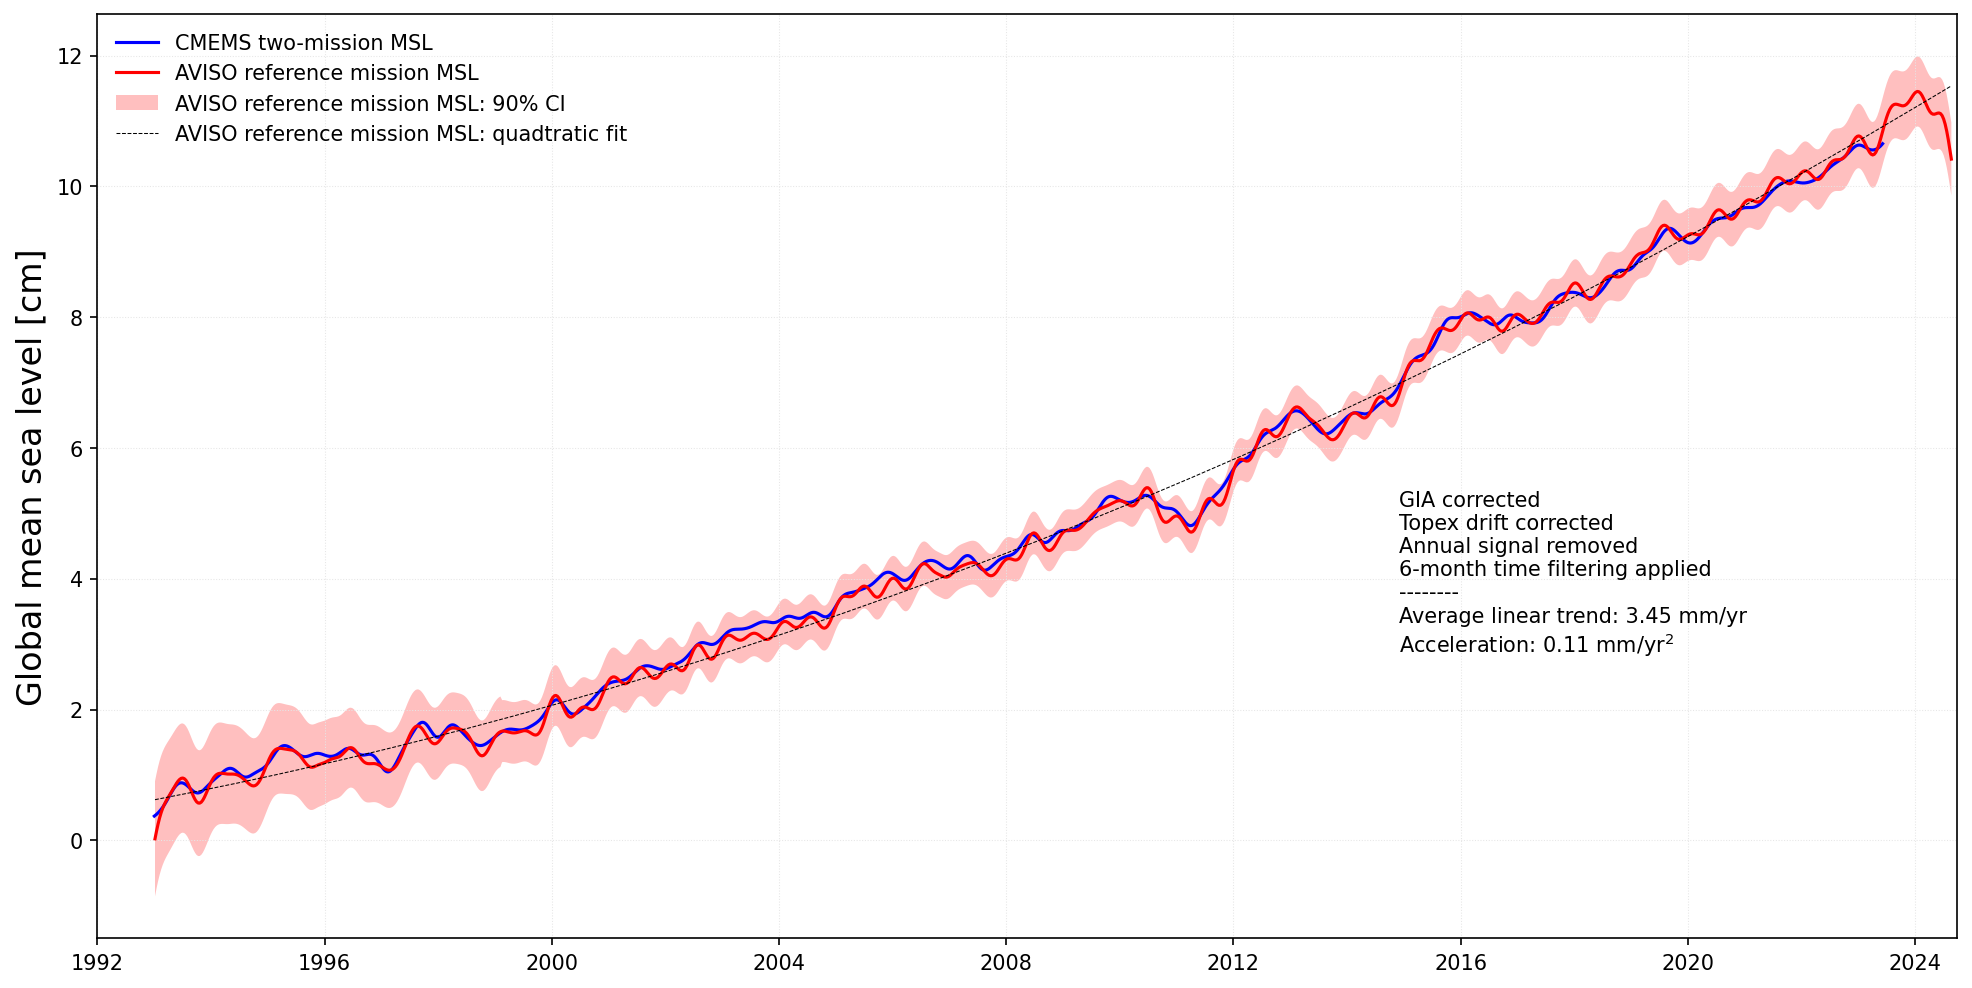

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=150)

for data, label in zip([MSL_time_series, MSL_time_series_aviso], ["CMEMS", "AVISO"]):
    y = pd.to_datetime(data.time)
    years = np.array([i.toordinal() for i in y]).astype(float)/365.2422

    # plot data
    if label == "CMEMS":
        p1, = ax.plot(data.time, data.MSL_filtered_GIA_TPA_corrected_adjusted, c="b", zorder=2)
    elif label == "AVISO":
        MSL = (data.msl - data.tpa_correction_to_substract + data.tpa_correction_to_substract[-1])*100
        p2, = ax.plot(data.time, MSL, c="r", zorder=3)
        p3  = ax.fill_between(data.time, MSL - data.envelop*100, MSL + data.envelop*100, color="r", edgecolor=None, alpha=0.25, zorder=1)        

        # weighted least squares trend calculations
        errors = np.array(MSL) - np.mean(np.array(MSL))
        error_variance = np.var(errors)        
        order_1 = np.polyfit(years, MSL, 1, w=np.ones(len(MSL))/error_variance, full=True)
        order_2 = np.polyfit(years, MSL, 2, w=np.ones(len(MSL))/error_variance, full=True)
        slope_1 = order_1[0][0]*10
        slope_2 = order_2[0][0]*10*2
        
        p4, = ax.plot(data.time, order_2[0][0]*years**2 + order_2[0][1]*years + order_2[0][2], linewidth=0.5, linestyle="--", color="k", zorder=4)

    ax.set_xlim([datetime.datetime(1992,1,1), datetime.datetime(2024,9,30)])
    ax.grid(linestyle=":", color="0.9", linewidth=0.5)
    
ax.annotate(f"GIA corrected\nTopex drift corrected\nAnnual signal removed\n6-month time filtering applied\n\
--------\nAverage linear trend: {'%.2f' % slope_1} mm/yr\nAcceleration: {'%.2f' % slope_2} mm/yr$^{2}$", (0.7, 0.31), xycoords="axes fraction", color="k")

plt.ylabel('Global mean sea level [cm]', fontsize=16)
ax.legend([p1, p2, p3, p4], ['CMEMS two-mission MSL', 'AVISO reference mission MSL', 'AVISO reference mission MSL: 90% CI', 'AVISO reference mission MSL: quadtratic fit'], frameon=False)
plt.savefig("MSL_reference_missions_time_series.png", bbox_inches="tight")

In this plot we can clearly see that, despite some small difference, the two curves align extremely well. Using the AVISO/CNES record, we can see that global sea level has increased by 3.45 mm/yr and that see level rise is accelerating at 0.11 mm/yr$^{2}$.

Beyond the significant and accelerating positive trend, there is also interannual variability in the mean sea level. Those working on the mean sea level record carefully consider the variability to relate it to environmental phenomena and ensure it is not reflective of instrument changes or processing errors. For example, the later months of the index show a drop, following a rise of similar amplitude. Worldwide investigations, led by teams of altimetry MSL experts (French, US and Australian's teams), have confirmed that there is no problem with the altimetry instruments and nothing unusual in the processing.

The rise and drop sequence is very similar in amplitude and shape to that seen for past El Niño episodes and/or at the onset of La Niña episodes (for example, see 2015–2016 for the onset and end of an El Niño, and 2010–2011 for a La Niña). A strong El Niño phase, among the five strongest recorded in intensity (following ENSO Reference Group's March 2024 assessment), ended a few months ago, and probabilities are high for a La Niña this winter. This sequence of a rise followed by a drop is, therefore, probably due to ENSO-induced changes in water masses distributions between continents and oceans, and temporary changes in ocean water temperatures.

<div class="alert alert-info" role="alert">

## 8. <a id='section8'></a>Fetching a global sea-level trend maps from the Copernicus Marine Service
[Back to top](#TOC_TOP)

</div>

The whole ocean does not show the same sea level variation trend everywhere - some areas are rising fast, other less so. Very few areas show a decrease, but they do exist. 
The acceleration rate of the rise is even less homogenous. In the final step of this workflow, lets use Copernicus Marine Service products to display maps of the trend and acceleration acros the globe over the last 20 years. These maps are produced by computing the trends at each grid point from the daily gridded (L4) maps.

Firstly, let us open the required, remote product. You can find a link to this product in the **Data used** section at the top of the page.

In [25]:
MSL_map = copernicusmarine.open_dataset(
           dataset_id = "omi_climate_sl_global_regional_trends")

INFO - 2025-06-10T13:36:39Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2025-06-10T13:36:39Z - Dataset part was not specified, the first one was selected: "default"
WARNING - 2025-06-10T13:36:39Z - The dataset omi_climate_sl_global_regional_trends, version '202406', will be retired on the 2025-06-25T00:00:00.000Z. After this date, it will no longer be available on the toolbox.
INFO - 2025-06-10T13:36:39Z - Service was not specified, the default one was selected: "omi-arco"


As we can see below, the product contains two gridded variables, the `trend_GIA_TPA_corrected` (linear trend) and `acceleration_TPA_corrected` (acceleration).

In [26]:
MSL_map

<xarray.Dataset> Size: 8MB
Dimensions:                     (longitude: 1440, latitude: 720)
Coordinates:
  * latitude                    (latitude) float64 6kB -89.88 -89.62 ... 89.88
  * longitude                   (longitude) float64 12kB -179.9 -179.6 ... 179.9
Data variables:
    acceleration_TPA_corrected  (longitude, latitude) float32 4MB ...
    trend_GIA_TPA_corrected     (longitude, latitude) float32 4MB ...
Attributes:
    Conventions:  CF-1.7
    area:         GLOBAL
    comment:      Period : 1993-01-01 to 2023-06-07.
    contact:      https://marine.copernicus.eu/contact
    credit:       E.U. Copernicus Marine Service Information
    institution:  CLS
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    references:   http://marine.copernicus.eu
    source:       The values are based on the two-satellite merged altimeter ...
    title:        Map of Sea Level Trends from DUACS DT2021

Let's now plot both of these in turn, starting the with linear trend in sea level;

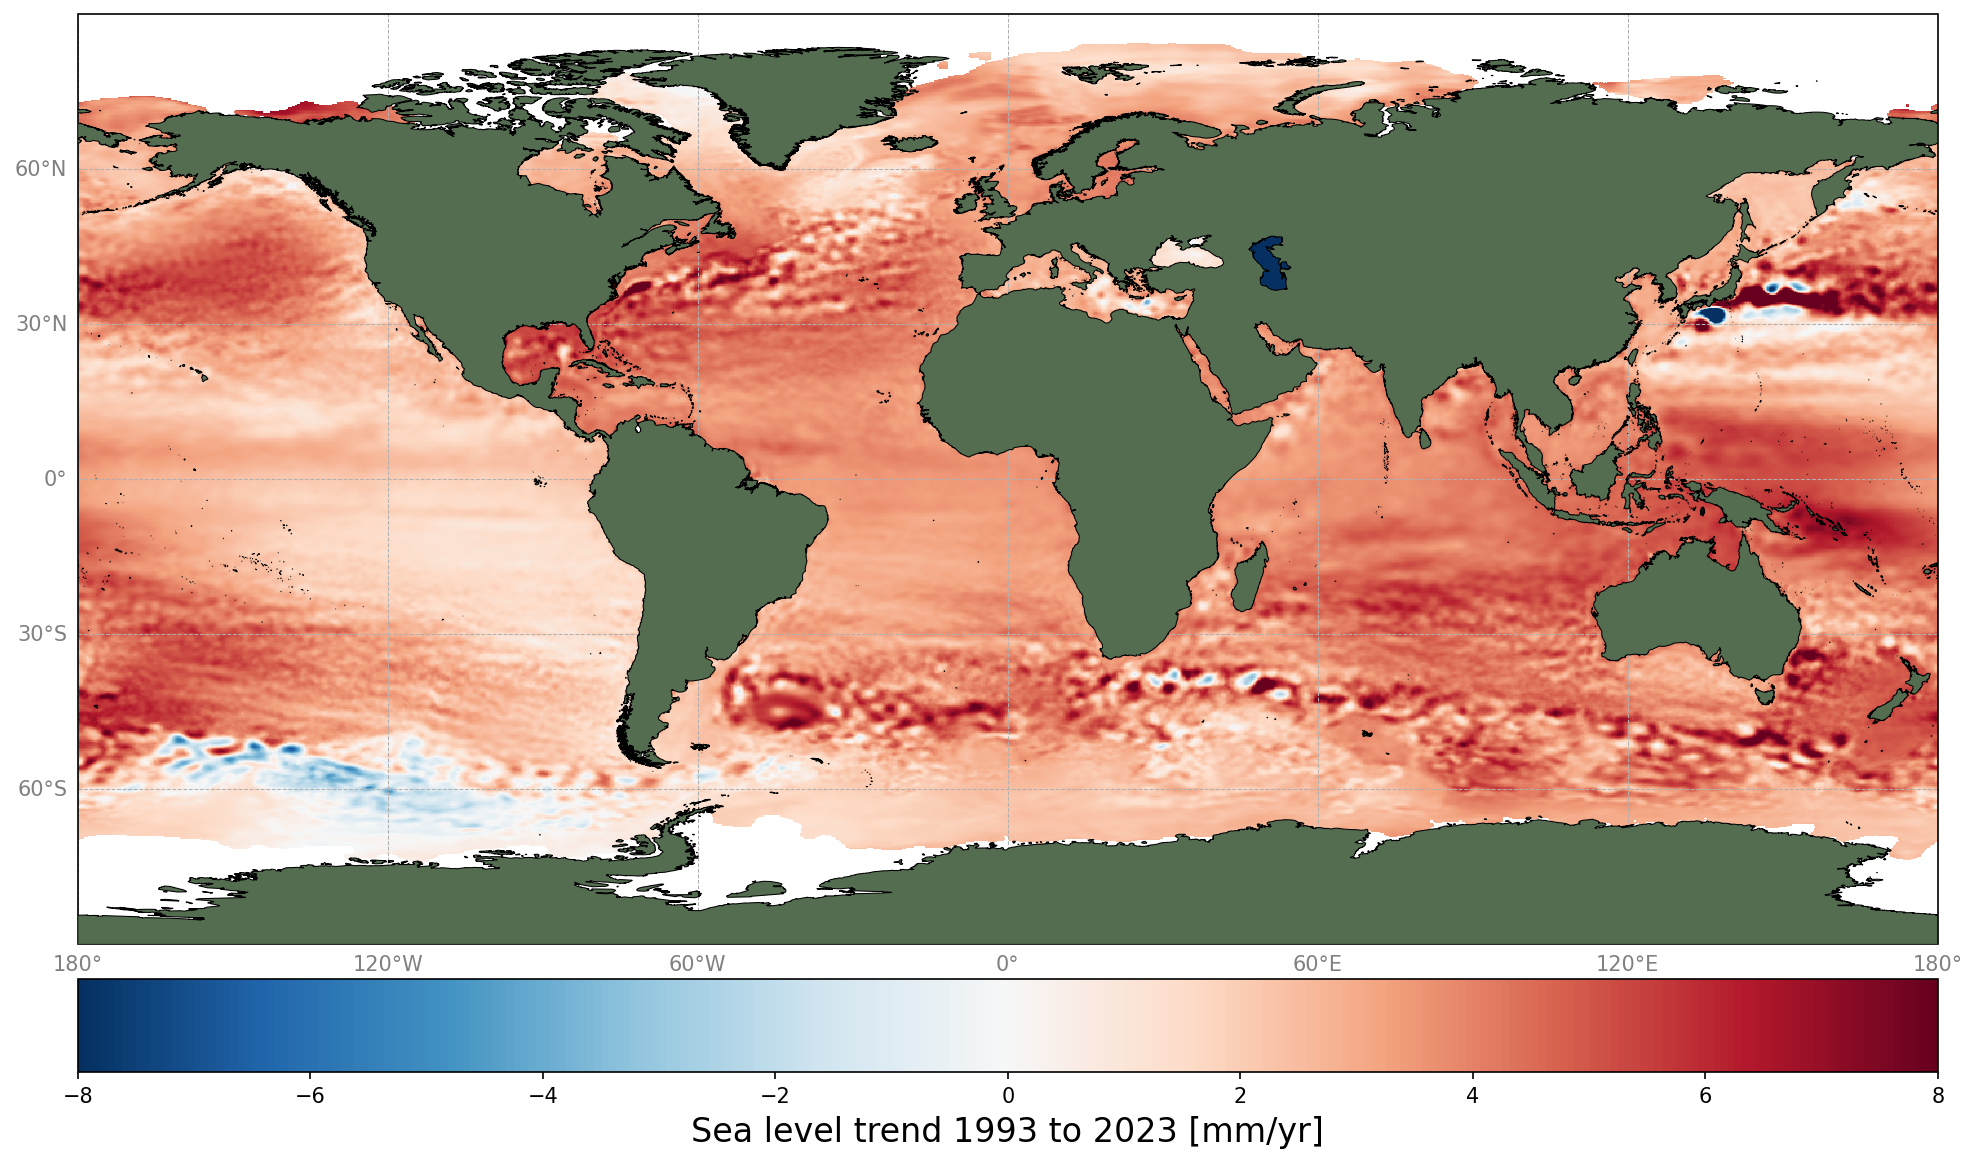

In [27]:
fig, m = plt.subplots(1, 1, figsize=(16, 12), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})
p1 = m.pcolormesh(MSL_map.longitude, MSL_map.latitude, MSL_map.trend_GIA_TPA_corrected.T, cmap="RdBu_r", vmin=-8, vmax=8)
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}
cbar = plt.colorbar(p1, orientation='horizontal', pad=0.025)
cbar.set_label(f"Sea level trend {pd.DatetimeIndex(MSL_time_series.time).year[0]} to {pd.DatetimeIndex(MSL_time_series.time).year[-1]} [mm/yr]", fontsize=16)
plt.savefig("MSL_regional_trends.png", bbox_inches="tight")

Ads discussed, we can see that sea level rise is not homogenous, but with the exception of the some parts of some parts of the Southern Ocean and the highly dynamic regions of the Kurushio and Agulhas Currents, it is almost entirely positive (sea level increasing). The most pronounced positive signals can be seen in western and poleward edge of the subtropical gyres, corresponding to the western boundary currents and their extensions.

Lets now look at the acceleration...

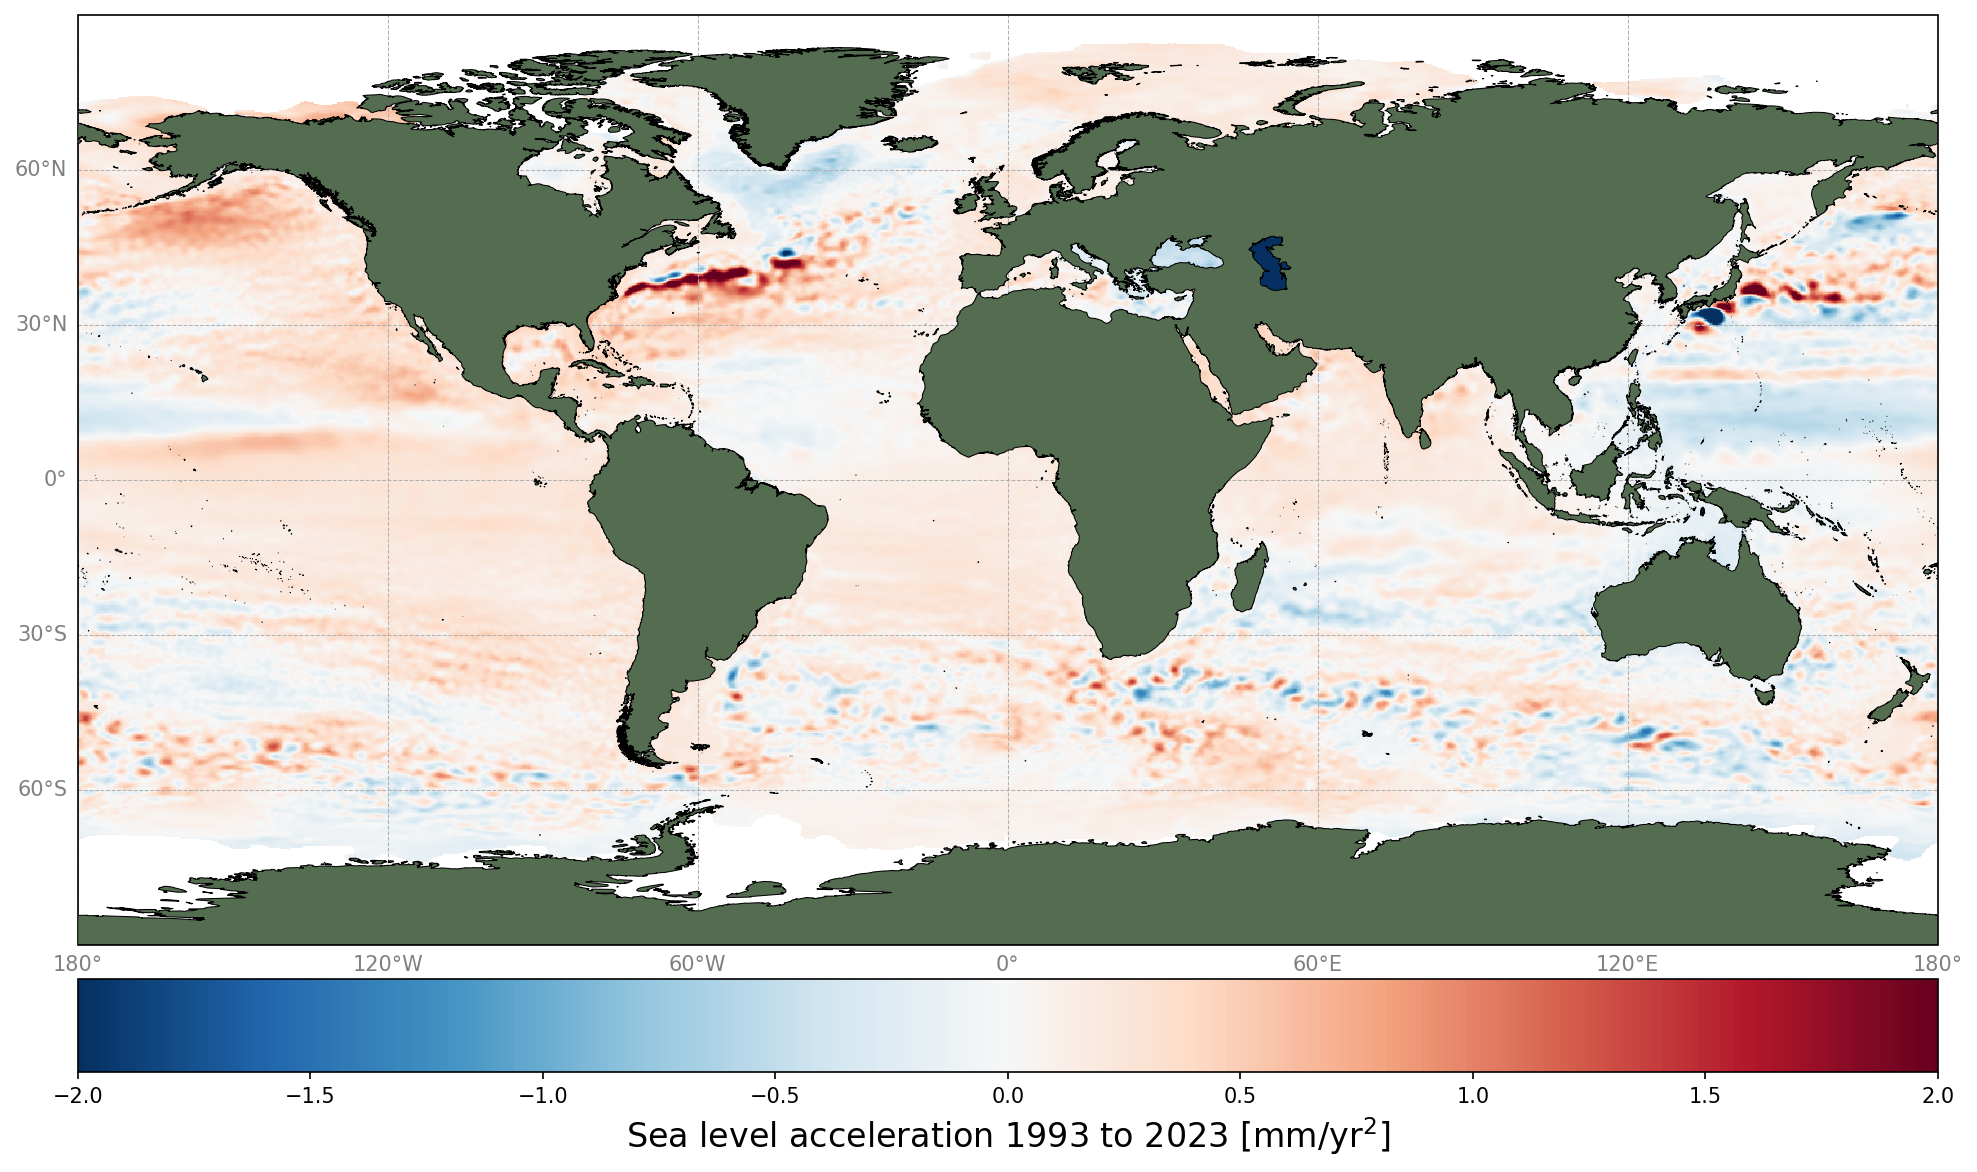

In [28]:
fig, m = plt.subplots(1, 1, figsize=(16, 12), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})
p1 = m.pcolormesh(MSL_map.longitude, MSL_map.latitude, MSL_map.acceleration_TPA_corrected.T, cmap="RdBu_r", vmin=-2, vmax=2)
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}
cbar = plt.colorbar(p1, orientation='horizontal', pad=0.025)
cbar.set_label(f"Sea level acceleration {pd.DatetimeIndex(MSL_time_series.time).year[0]} to {pd.DatetimeIndex(MSL_time_series.time).year[-1]} [mm/yr$^{2}$]", fontsize=16)
plt.savefig("MSL_regional_trend_accel.png", bbox_inches="tight")

The spatial patterns here are quite heterogenous, with the Gulf Stream extension standing out as the most dramatically positive feature.

<div class="alert alert-info" role="alert">

## <a id='section9'></a>9. Conclusions
[Back to top](#TOCTOP)

</div>

In the above examples, we have considered MSL from a number of perspectives; from its calculation across a single sensor and cycle, to the full 30+ year global time series to regional variations. To assess the exposure of a region to changes in sea level, it is also important to know land movements to assess what is happening at a given coast. GIA, as mentioned above, can lead to a local rise of the coast itself. On the contrary, a number of processes can lower the land, for example land subsidence (eg, from underground water pumping), sediment deposition or removal, etc. For future projections, the global climate change scenarios are alos of utmost importance, not forgetting that life for low-lying coastal communities will get complicated a long time before being permanently submerged; particularly through water and land salinisation, but also through increased exposure to storm surge, and much more frequent flooding.

After being a nearly linear trend for much of its measured history, sea level rise is now clearly accelerating. This acceleration is even more pronounced once new, drift-corrected, reprocessings of earlier reference missions are taken into account (eg, for Topex-A). Continuous monitoring by Sentinel-6 Michael Freilich, and its successor Sentinel-6B, are, and will continue to be essential in extending the legacy of the, now 30 year, reference mission, enabling us to continue to acquire mean sea level measurements at the highest quality, and better monitor and quantify this acceleration.

<hr>
<a href="../../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>